In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

C:\Users\dyb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import pathlib
data_root_orig = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)

C:\Users\dyb\.keras\datasets\flower_photos


In [3]:
for item in data_root.iterdir():
    print(item)

C:\Users\dyb\.keras\datasets\flower_photos\daisy
C:\Users\dyb\.keras\datasets\flower_photos\dandelion
C:\Users\dyb\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\dyb\.keras\datasets\flower_photos\roses
C:\Users\dyb\.keras\datasets\flower_photos\sunflowers
C:\Users\dyb\.keras\datasets\flower_photos\tulips


In [4]:
import random 
all_image_paths = list(data_root.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print(image_count)

3670


In [5]:
all_image_paths[:10]

['C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\tulips\\13510057763_01b832d919.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\dandelion\\4629844753_4e02015d29_m.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\roses\\4735314389_94fe1b2a9f_n.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\roses\\9164900485_605aa12da8.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\daisy\\4434592930_6610d51fca_m.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\tulips\\6931489544_2f35025f7b_m.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\dandelion\\9188647508_3b56e62f69.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\sunflowers\\9485002920_59af6f4cac.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\roses\\15949087094_a8f565295c_m.jpg',
 'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\sunflowers\\3514340206_efb8198a80_n.jpg']

In [6]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

In [7]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    # return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

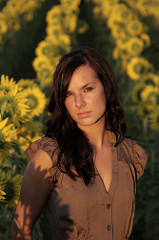

None



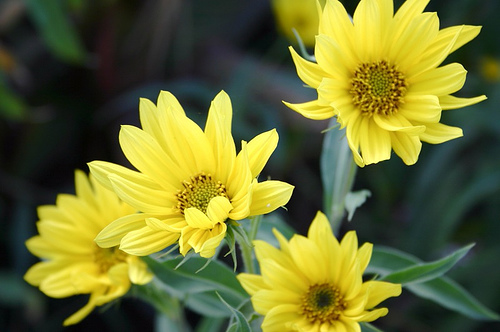

None



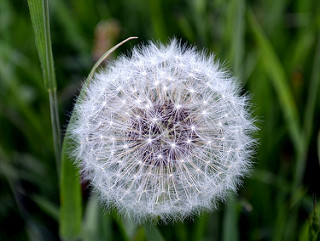

None



In [8]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))
  print()

In [9]:
label_names = sorted(item.name for item in data_root.glob("*/") if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [10]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [11]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
print("First 10 labels in indices:", all_image_labels[:10])

First 10 labels in indices: [4, 1, 2, 2, 0, 4, 1, 3, 2, 3]


In [12]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\dyb\\.keras\\datasets\\flower_photos\\tulips\\13510057763_01b832d919.jpg'

In [13]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\...


In [14]:
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

(333, 500, 3)
<dtype: 'uint8'>


In [15]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0007420035
0.9174578


In [16]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [17]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [18]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [19]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [20]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

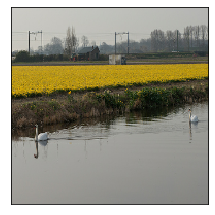

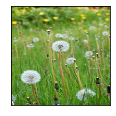

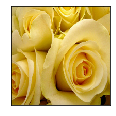

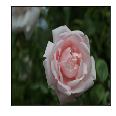

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()


In [22]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [23]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

tulips
dandelion
roses
roses
daisy
tulips
dandelion
sunflowers
roses
sunflowers


In [24]:
image_labels_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [25]:
print(image_labels_ds)

<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [26]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label
image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [27]:
BATCH_SIZE = 32

ds = image_labels_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [28]:
ds = image_labels_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

W1115 19:19:20.402010 162680 deprecation.py:323] From <ipython-input-28-c80ecf87d901>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<PrefetchDataset shapes: ((None, 192, 192, 3), (None,)), types: (tf.float32, tf.int64)>

In [29]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [32]:
def change_range(image, label):
    return 2 * image-1, label

keras_ds = ds.map(change_range)